# Predicting heart disease using maching learning

This nootbook looks into using various python-based maching learning and data science
libraries in an attempt to build a machine learning model capable of predicting wheather or not someone
has disease based on their medical attributes.

we're going to take the following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

# 1. Problem defination

In a statement,
> Given clinical parameters about a patient, can we predict wheather or not they have heart disease.

# 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

There is also a version of it availiable on Kaggle.
https://www.kaggle.com/ronitf/heart-disease-uci

# 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the 
proof of concept, we'll pursue the project.

# 4. Features

This is where you will get different information about each of the features in your data. you can do this via doing your own research (such as looking at the above links) or by talking to a subject matter expert (someone who knows about the datasets). 
 
**Create data dictionary**

1. ageage in years
2. sex(1 = male; 0 = female)
3. cpchest pain type
    * 0. Typical angina: chest pain related decrease blood supply to the heart
    * 1. Atypical angina: chest pain not related to heart
    * 2. Non-anginal-pain: typical esophageal spasms(non heart related)
    * 3. Asymptomatic: chest pain not showing signs of disease
4. trestbps-resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically casue for concern
5. chol-serum cholestoral in mg/dl
    * 1. serum = LDL + HDL +.2*triglycerides
    * 2. above 200 is cause for concern
6. fbs(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
    * 1. '>126' mg/dl signals diabetes
7. restecg-resting electrocardiographic results
    * 1. Nothing to note
8. thalachmaximum heart rate achieved
9. exangexercise induced angina (1 = yes; 0 = no)
10. oldpeakST depression induced by exercise relative to rest
11. slopethe slopeof the peak exercise ST segment
12. canumber of major vassels (0-3) coloured by flourosopy
13. thal3 =normals; 6 = fixed defect; 7 = reversable defect
14. target 1 or 0

# Preparing the tools

we are going to use Pandas, Matplotlib and Numpy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis)  and plotting libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# we want our plot to appear inside the notebook
%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# models Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

**Load Data**

In [2]:
df = pd.read_csv('11.3 heart-disease.csv')
df.shape

(303, 14)

# Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become subject matter  export on the dataset you are working with.

1. what question(s) are you are trying to solve?
2. what kind of data do we have and how do we treat different types?
3. whats missing from the data and how do we deal with it
4. where are the outliers and why should you care about them?
5. how can you add, change or remove the features to get more out of your data?

In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
# lets find out how many of each class they are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

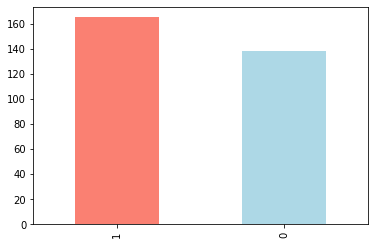

In [5]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue']);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# are they any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart Disease Freqency according to sex

In [9]:
df.sex.value_counts(), #they are more male than female

(1    207
 0     96
 Name: sex, dtype: int64,)

In [10]:
# Compare target column with sex column
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


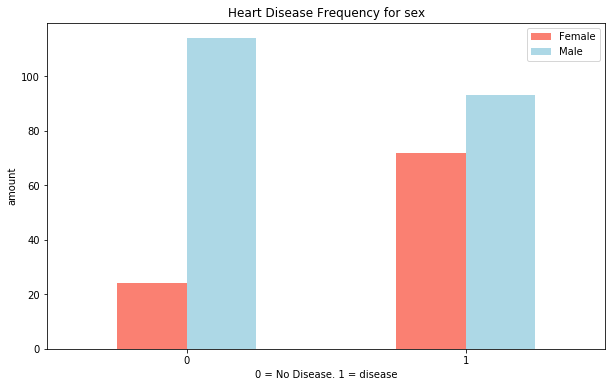

In [11]:
# Create a plot of crosstab
pd.crosstab(df['target'], df['sex']).plot(kind='bar',
                                         figsize=(10, 6),
                                         color=['salmon', 'lightblue']);
plt.title('Heart Disease Frequency for sex')
plt.xlabel('0 = No Disease. 1 = disease')
plt.ylabel('amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)#it will rotate the 0 and 1 vertically on the x-axis
plt.show()

# Age vs. max Heart Rate for Heart Disease

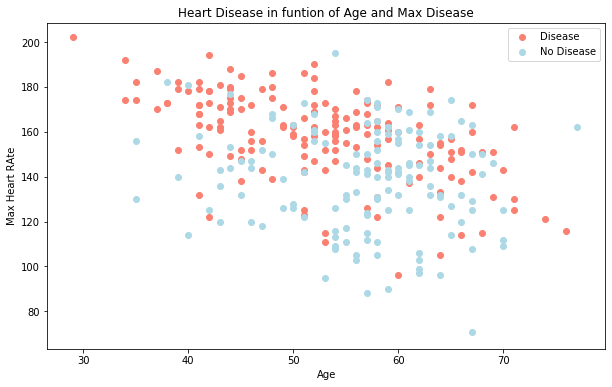

In [12]:
# Create another figure
plt.figure(figsize=(10, 6))

# scatter plot with positive example
plt.scatter(df.age[df.target==1],#meaning where 'target' column equals 1 to compare with age
           df.thalach[df.target==1],#meaning where 'target' column equals 1 to compare with thalach
           color='salmon');

# scatter plot with negative example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color='lightblue');

# Add some help info
plt.title('Heart Disease in funtion of Age and Max Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart RAte')
plt.legend(['Disease', 'No Disease']); 

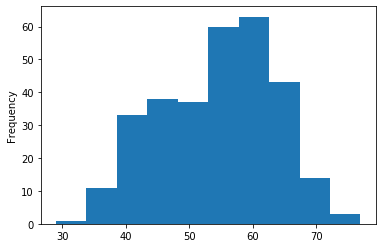

In [13]:
# Check the distribution of the age column with a histogram
df.age.plot.hist()

# Heart Disease Frequency Per Chest Pain Type

3. cpchest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal-pain: typical esophageal spasms(non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


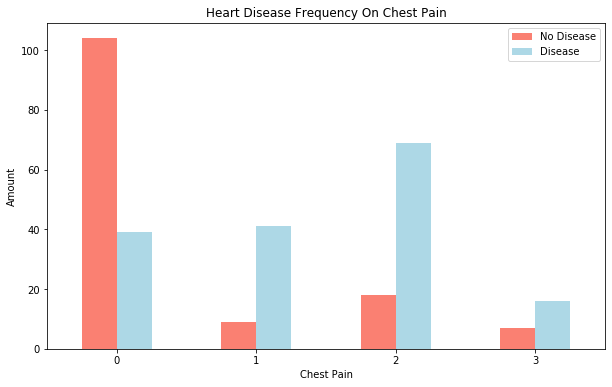

In [15]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize=(10, 6),
                                  color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency On Chest Pain')
plt.xlabel('Chest Pain')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)
plt.show()

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Make a corrulation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

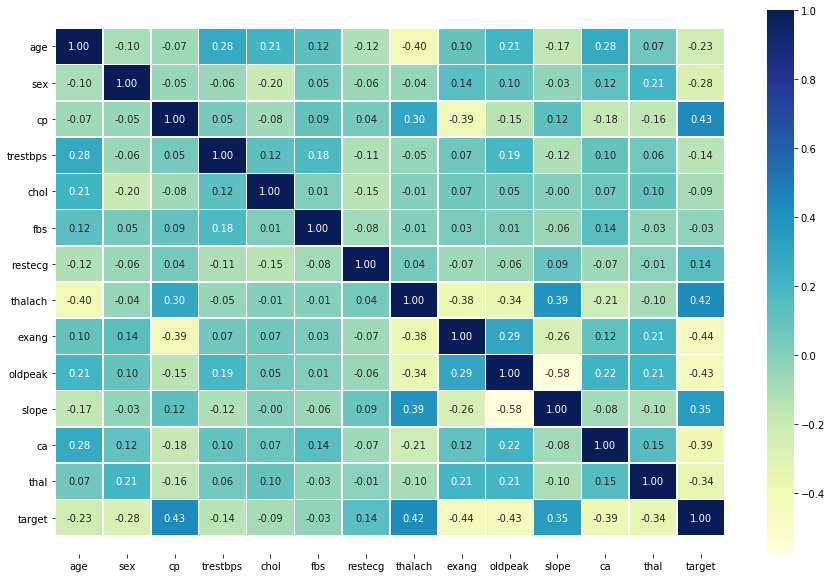

In [18]:
# lets make our corrulation matrix a little prettier

corr_matrix = df.corr()
fig, ax =plt.subplots(figsize=(15, 10))
ax =sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f', # the digit should in 2 decemal place
                cmap='YlGnBu')
button, top = ax.get_ylim()
ax.set_ylim(button + 0.5, top - 0.5)

#  5. Modelling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Split data into X and y
X = df.drop('target', axis=1)

y = df['target']

In [21]:
# Split data into train and test set
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we've got our data split into training and test sets, its time to build a machine learning model,

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test sets

We're going to try # different machine learning models:
1. Logistic Regression
2. KNeighbors Neighbors Classifier
3. Random Forest Classifier

In [22]:
# Putting the 3 models in a dictionary to see there performance
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    fits and evaluates given machine learning models
    models: a dictionay off scikit-learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    '''
    # set random seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {} # create an empty dictionary to append to it
    # Loop through models
    for name, model in models.items(): # for key and value in models 
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test) #creat a key which is d 'name' in the empty dict.
    return model_scores

In [23]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)

model_scores

C:\Users\computer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Model comparison

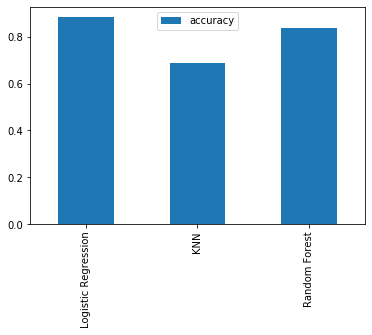

In [24]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])#we just put accuracy cos if u remember score is mean accuracy
model_compare.T.plot.bar();

# wow!!! Below you can see that logistic regression will be good for predicting heart disease

Now we've got baseline mode.... and we know a model's first predictions ain't always what we should base our next steps off.what should we do?

let's look at the following:
* Hyperparameter Tuning
* Feature Importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC

# Hyperparameter tuning by (Hand)

In [25]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i) # going to create 20 different knn models
    
    #fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list and append there scores to list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [26]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [27]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

 Maximum KNN score on the test data: 75.41%


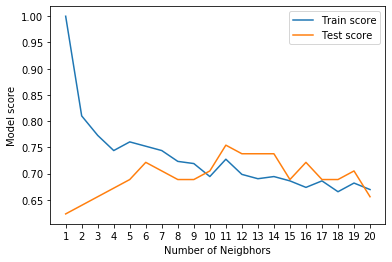

In [28]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of Neigbhors')
plt.ylabel('Model score')
plt.legend()

print(f' Maximum KNN score on the test data: {max(test_scores)*100:.2f}%');

#note: even as we turn the KNN is till lower than logisticregression as above

# Hyperparameter tuning with RandomizedSearchCV

we are going to tune:
* LogisticRegression()
* RandomForestClassifier()

....using RandomizedSearchCV

In [29]:
# Create a Hyperparameter grid  for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20), #we using c and solver for logistcregression from d documentation
                'solver': ['liblinear']}

# Create Hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, lets tune the above using RandomizedSearchCV..

In [30]:
# Tune LogisticRegression on cross-validation

np.random.seed(42)

#setup random Hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5, # it will split the cross-validation 5 times
                               n_iter=20, # number of itration would be 20 times
                               )

# Fit Hyperparameter Search model  for LogiticRegression
rs_log_reg.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), lets do the same for RandomForestClassifier()

In [33]:
# setup random seed
np.random.seed(42)

# Setup random Hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

#Fit random Hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [34]:
#Find the best Hyperparameter
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [35]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

In [36]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best score so far, we'll try and improve them again using GridSearchCV...

In [37]:
# Different Hyperparameter for our LogisticRegression model
#NB: keyword to search (how to tune a logistic regression machine learning model using python)
log_reg_grid = {'C': np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

# Setup grid Hyperparameter search for LogsticRegression model
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                       # we didnt add 'n_iter' cos GridSearch try every single combination params and finds the best
                         verbose=True)# its gives us little output of whats happening

# Fit grid search Hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.9s finished


In [38]:
# Check the best Hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [39]:
# Evaluates the GridSearch logistcRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [40]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Evaluating our tuned machine learning classifier, beyond accuracy

* ROC Curve and AUC Curve
* Confusion matrix
* Classification report
* precision score
* Recall score
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [41]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [42]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [43]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

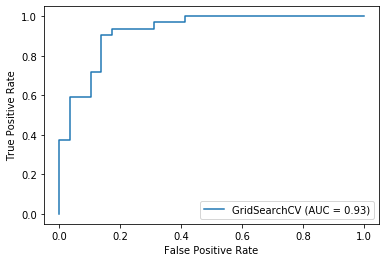

In [44]:
# Plot ROC curve and calcalute the AUC metric

plot_roc_curve(gs_log_reg, X_test, y_test)

In [45]:
# Confuson matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


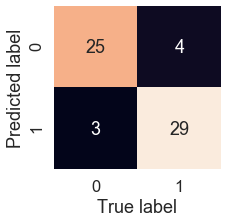

In [46]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    plots a nice looking confusion matrix using seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
#     buttom, top = ax.get_ylim()
#     ax.set_ylim(buttom + 0.5, top - 0.5)
    
    plt.xlabel("True label")
    plt.ylabel('Predicted label')
plot_conf_mat(y_test, y_preds)

Now we've got ROC Curve, an AUC metric and a confusion matrix, lets get a classification report as well as cross-vaidated precision, recall and f1-score.

In [47]:
# Note: dont forget that our classification_report on a norms can also give us precision, recal and f1-score
print(classification_report(y_test, y_preds)) #lol! dont 4get, we just calculated on 1 test split, lets try cross-val!!!

# In classification_report, if our model must be PERFECT then False +ve rate and False -ve rate would be 0 there the boxes, 
# thats when then precision and recall will both be 1.0. meaning is 100% accurate 
# F1 is the combination of precision and recall

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# calculate Evaluation matrix using cross-validation

we're going to caluculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [48]:
# Check best Hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [49]:
# Create a new Classifier with best Parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

In [50]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring = 'accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [51]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [52]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='precision')
cv_precision 

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [53]:
cv_precision = np.mean(cv_precision)
cv_precision 

0.8215873015873015

In [54]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                           X,
                           y,
                           cv=5,
                           scoring='recall')
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [55]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [56]:
# cross-validated F1-score
cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring='f1')
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [57]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

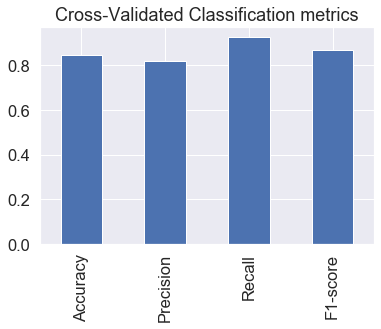

In [58]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc, 
                          'Precision': cv_precision,
                          'Recall': cv_recall,
                          'F1-score': cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title='Cross-Validated Classification metrics',
                     legend=False);

# Feature Importance

Feature importance is another way of asking , "which features contributed 
most to the outcomes of the model and how did they contribute?"


Finding features importance is different for each machine learning model.

#NB: one way to find feature importance is to search for the (MODEL NAME), e.g, how to find features importance using logistic regression (by asking google)

let's find the feature importance for our LogisticRegression model....

In [59]:
# Fit an Instance of LogisticRegression

clf = LogisticRegression(C = 0.20433597178569418,
                       solver='liblinear')
clf.fit(X_train, y_train);

In [76]:
# Check coef_
clf.coef_ # the coeffient gives/tells us how each independent variables data set contributes to the label/target

array([[ 0.00316728, -0.86044636,  0.66067051, -0.01156993, -0.00166374,
         0.04386116,  0.31275829,  0.02459361, -0.60413071, -0.56862818,
         0.45051626, -0.63609888, -0.67663381]])

In [99]:
# Match coef's of feature to column
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003167278990517721,
 'sex': -0.8604463644626569,
 'cp': 0.6606705054012705,
 'trestbps': -0.011569931335912368,
 'chol': -0.0016637438070300692,
 'fbs': 0.04386116284216185,
 'restecg': 0.31275829369964075,
 'thalach': 0.02459361297137234,
 'exang': -0.6041307139378419,
 'oldpeak': -0.5686281825180214,
 'slope': 0.450516263738603,
 'ca': -0.6360988840661891,
 'thal': -0.6766338062111971}

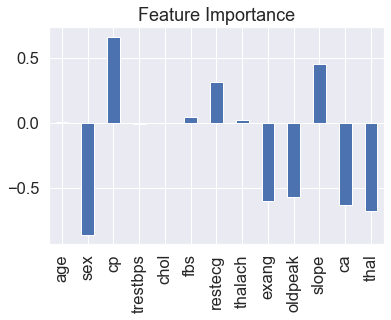

In [103]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance',
                     legend=False);

# the below bar plot shows much each features contributes to target variable weather sumone has hrt disease or not

In [104]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [105]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 6 Experimentation

If you havn't hit your evaluation metric yet?...ask yourself somethings.....

* could you collect more data?
* could you try a better model? Like CatBoost or XGBoost?
* could we imporve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share with others?